## PREDİCT FUTURE SALES
1- Checking For Null Values\
2- Overwiev About Outliers\
3- Exploratory Data Analysis\
4- Clustering The Data\
5- Applying Supervised ML Algorithms\
6- Applying Ensemble Methods\
7- Applying ANN Model

## A) Import and get to know the data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px # To Generate box plot for statistical representation
sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings(action="ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!nvidia-smi

Sun Jun 20 11:34:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
import os
os.getcwd()

'/content'

In [5]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Project/Graduation_Project'
os.chdir(PATH)

In [6]:
# loading dataset
df = pd.read_csv("heart.csv")

In [7]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**age** - age in years\
**sex** - (1 = male; 0 = female)\
**cp** - chest pain type\
**trestbps** - resting blood pressure (in mm Hg on admission to the hospital)\
**chol** - serum cholestoral in mg/dl\
**fbs** - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
**restecg** - resting electrocardiographic results\
**thalach** - maximum heart rate achieved\
**exang** - exercise induced angina (1 = yes; 0 = no)\
**oldpeak** - ST depression induced by exercise relative to rest\
**slope** - the slope of the peak exercise ST segment\
**ca** - number of major vessels (0-3) colored by flourosopy\
**thal** - 3 = normal; 6 = fixed defect; 7 = reversable defect\
**target** - have disease or not (1=yes, 0=no)

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
print("Dataset size : ",df.size)

Dataset size :  4242


In [12]:
print("Shape of dataset  : ", df.shape)

Shape of dataset  :  (303, 14)


In [13]:
print("Dimension of dataset  : ", df.ndim)

Dimension of dataset  :  2


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [15]:
# renaming attributes
df = df.rename(columns={'age': 'Age', 'sex': 'Gender', 'cp': 'CP',
                       'trestbps': 'Trestbps', 'chol': 'Chol', 'fbs': 'FBS',
                       'restecg': 'Restecg', 'thalach': 'Thalach', 'exang': 'Exang',
                       'oldpeak': 'OldPeak', 'slope': 'Slope', 'ca': 'CA',
                       'thal': 'Thal', 'target': 'Disease'})

# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       303 non-null    int64  
 1   Gender    303 non-null    int64  
 2   CP        303 non-null    int64  
 3   Trestbps  303 non-null    int64  
 4   Chol      303 non-null    int64  
 5   FBS       303 non-null    int64  
 6   Restecg   303 non-null    int64  
 7   Thalach   303 non-null    int64  
 8   Exang     303 non-null    int64  
 9   OldPeak   303 non-null    float64
 10  Slope     303 non-null    int64  
 11  CA        303 non-null    int64  
 12  Thal      303 non-null    int64  
 13  Disease   303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## B) Data Cleaning

### 1- Check the data type

In [16]:
df.head()

,Age,Gender,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The variables types are

* Binary: gender, fbs, exang, disease
* Categorical: cp, restecg, slope, ca, thal
* Continuous: age, trestbps, chol, thalac, oldpeak

In [17]:
df.nunique()

Age          41
Gender        2
CP            4
Trestbps     49
Chol        152
FBS           2
Restecg       3
Thalach      91
Exang         2
OldPeak      40
Slope         3
CA            5
Thal          4
Disease       2
dtype: int64

In [18]:
df.dtypes

Age           int64
Gender        int64
CP            int64
Trestbps      int64
Chol          int64
FBS           int64
Restecg       int64
Thalach       int64
Exang         int64
OldPeak     float64
Slope         int64
CA            int64
Thal          int64
Disease       int64
dtype: object

### 2 - Check for missing values

In [19]:
df.isnull().sum()

Age         0
Gender      0
CP          0
Trestbps    0
Chol        0
FBS         0
Restecg     0
Thalach     0
Exang       0
OldPeak     0
Slope       0
CA          0
Thal        0
Disease     0
dtype: int64

### 3- Check for duplicate rows

In [20]:
duplicated = df.duplicated().sum()
if duplicated:
    print('Duplicates Rows in Dataset are : {}'.format(duplicated))
else:
    print('Dataset contains no Duplicated Values')

Duplicates Rows in Dataset are : 1


In [21]:
duplicated = df[df.duplicated(keep=False)]
duplicated.head()

,Age,Gender,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### 4 - Statistics Summary

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
Gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
CP,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
Trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
Chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
FBS,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
Thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
Exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
OldPeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


Basically, with df.describe(), we should check on the min and max value for the categorical variables (min-max). Sex (0–1), cp (0–3), fbs (0–1), restecg (0–2), exang (0–1), slope (0–2), ca (0–3), thal (0–3). We should also observe the mean, std, 25% and 75% on the continuous variables.

## C) Distributions and Relationship

###  1- Target Variable Distribution

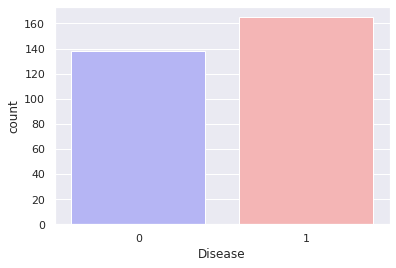

In [23]:
sns.countplot(x="Disease", data=df, palette="bwr")
plt.show()

In [24]:
countNoDisease = len(df[df.Disease == 0])
countHaveDisease = len(df[df.Disease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Disease))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


In [25]:
print(df.Disease.value_counts())

1    165
0    138
Name: Disease, dtype: int64


### 2- Gender Distribution According to Target Variable

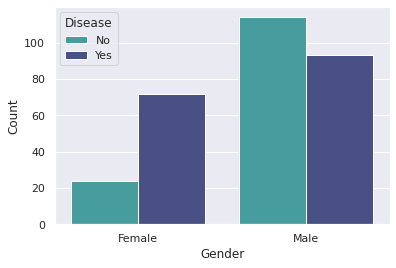

In [26]:
# Shows count of patients who do and don't have heart disease by sex
ax = sns.countplot(x='Gender', hue='Disease', data=df, palette="mako_r")
# Format labels and legend
ax.set_xlabel('Gender')
ax.set_xticklabels(['Female','Male'])
plt.legend(title='Disease', loc='upper left', labels=['No', 'Yes'])
plt.ylabel('Count')
plt.show()

In [27]:
countFemale = len(df[df.Gender == 0])
countMale = len(df[df.Gender == 1])
print("Percentage of Female Patients: {:.2f}%".format((countFemale / (len(df.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((countMale / (len(df.Gender))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


### 3- Age Variable Distribution

Text(0.5, 1.0, 'Age Distribution')

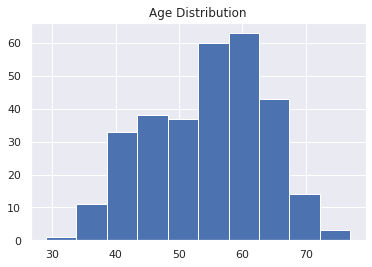

In [28]:
df['Age'].hist().plot(kind = 'bar')
plt.title('Age Distribution')

In [29]:
df['Age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: Age, dtype: float64

### 4- Visualize all Categorical Features

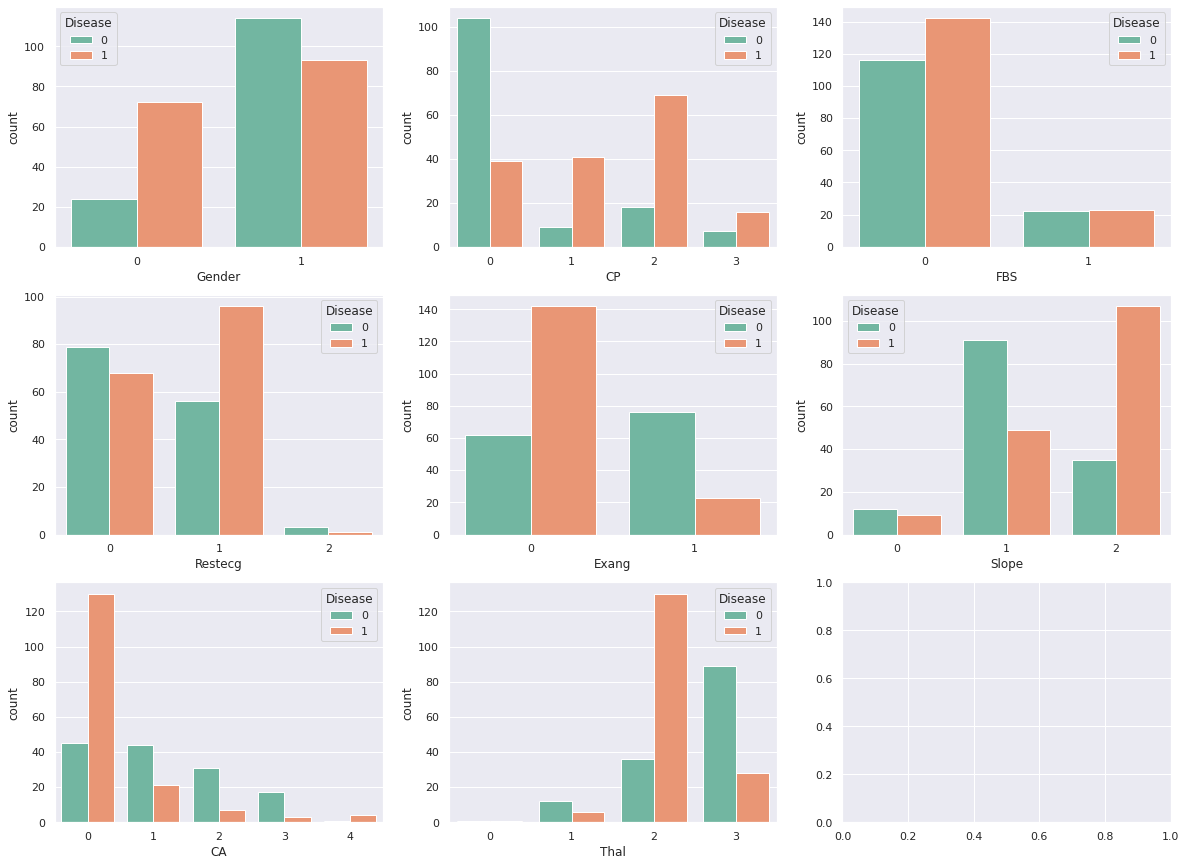

In [30]:
# for plotting, group categorical features in cat_feat
# to create dist in 8 feature, 9th is the target, 
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
cat_feat = ['Gender', 'CP', 'FBS', 'Restecg', 'Exang', 'Slope', 'CA', 'Thal', 'Disease']

for idx, feature in enumerate(cat_feat):
    ax = axes[int(idx/3), idx%3]
    if feature != 'Disease':
        sns.countplot(x=feature, hue='Disease', data=df, ax=ax, palette='Set2')

### 5- Visualize all Numerical Features

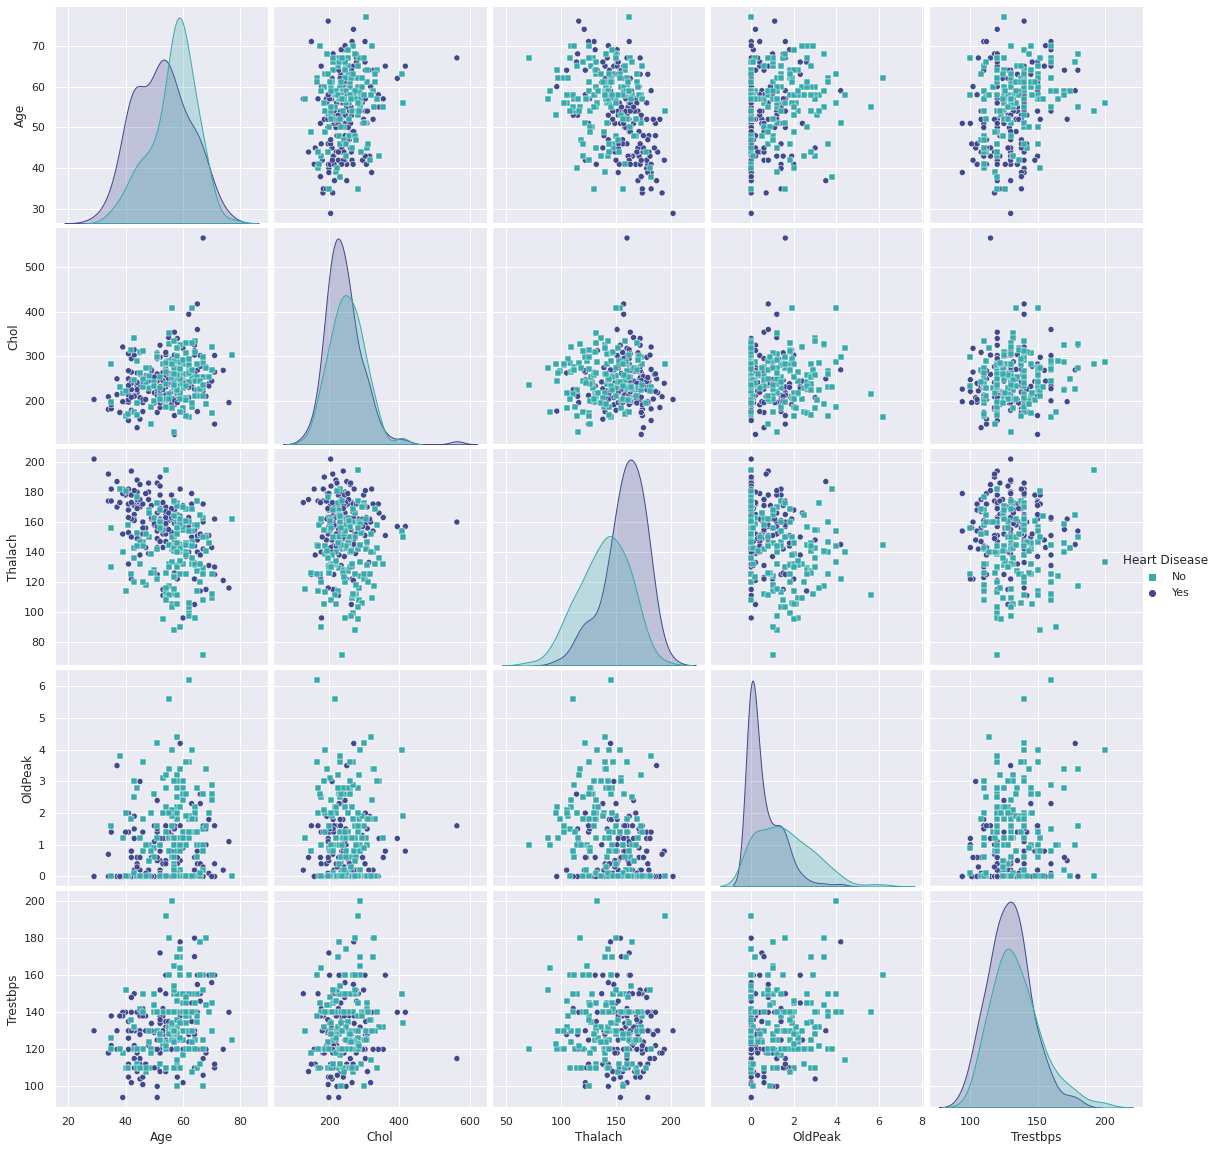

In [31]:

# Shows relationship between variables by target variable 
g = sns.pairplot(df, palette='mako_r', height=3.25, hue='Disease', 
                 markers=['s','o'], vars=['Age', 'Chol', 'Thalach', 'OldPeak','Trestbps'])

# replace legend title
new_title = 'Heart Disease'
g._legend.set_title(new_title)

# replace legend labels
new_labels = ['No', 'Yes']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
    
plt.show()

### 6-  Check Outliers and how to remove them

In [32]:
df.columns

Index(['Age', 'Gender', 'CP', 'Trestbps', 'Chol', 'FBS', 'Restecg', 'Thalach',
       'Exang', 'OldPeak', 'Slope', 'CA', 'Thal', 'Disease'],
      dtype='object')

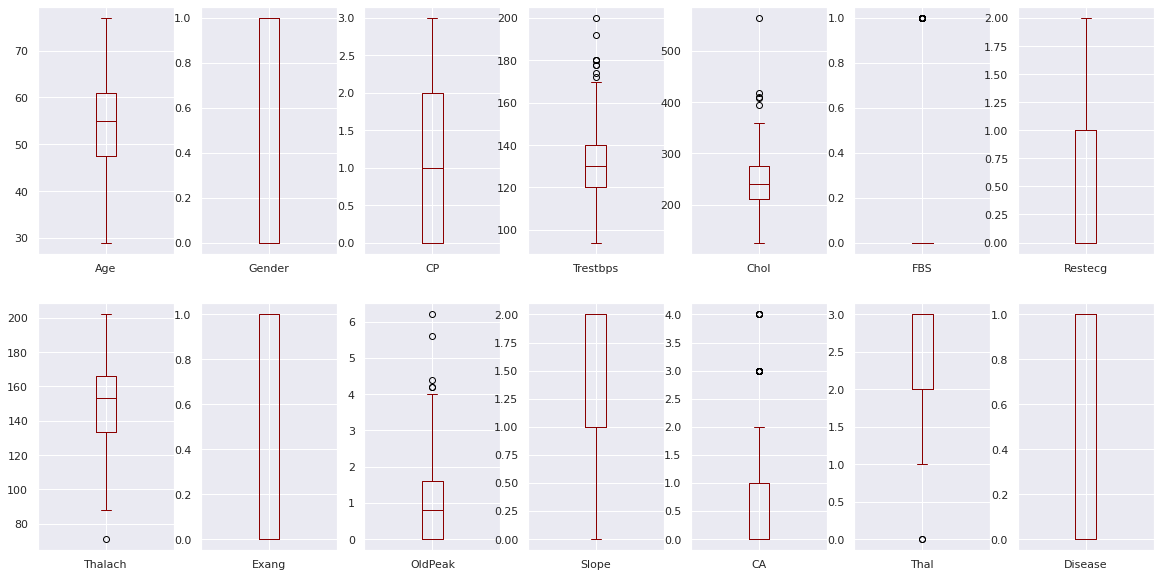

In [33]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='darkred');

In [34]:
fig = px.box(df, x='Disease', y='Chol')
fig.show()

In [35]:
fig = px.box(df, x='Disease', y='Trestbps')
fig.show()

In [36]:
fig = px.box(df, x='Disease', y='Thalach')
fig.show()

In [37]:
fig = px.box(df, x='Disease', y='OldPeak')
fig.show()

In [38]:

# define continuous variable & plot
continous_features = ['Age', 'Trestbps', 'Chol', 'Thalach', 'OldPeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature Age, No of Outliers is 0
For the feature Trestbps, No of Outliers is 9
For the feature Chol, No of Outliers is 5
For the feature Thalach, No of Outliers is 1
For the feature OldPeak, No of Outliers is 5


In [39]:
# drop the outliers
#outliers(df[continous_features], drop = True)

In [40]:
title_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
axis_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }
from scipy.stats.mstats import winsorize

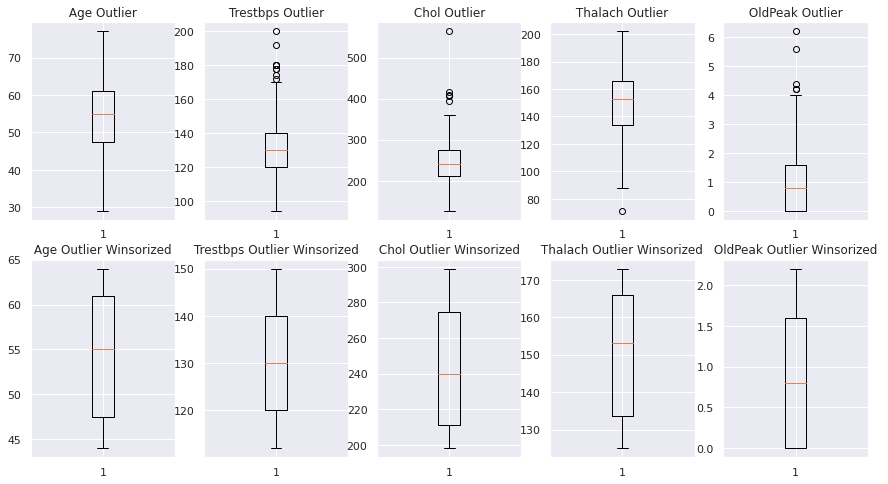

In [41]:

plt.figure(figsize=(15,8))

variables = ['Age', 'Trestbps', 'Chol', 'Thalach', 'OldPeak']

for i in range(5):
    plt.subplot(2, 5, i+1)
    plt.boxplot(df[variables[i]])
    plt.title(" {} Outlier ".format(variables[i],fontdict=title_font))
    
for i in range(5):
    plt.subplot(2, 5, i+6)
    plt.boxplot(winsorize(df[variables[i]], (0.15, 0.15)))
    plt.title(" {} Outlier Winsorized ".format(variables[i],fontdict=title_font))
    

plt.show()

In [42]:
df.groupby('Disease').mean()

,Age,Gender,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal
Disease,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


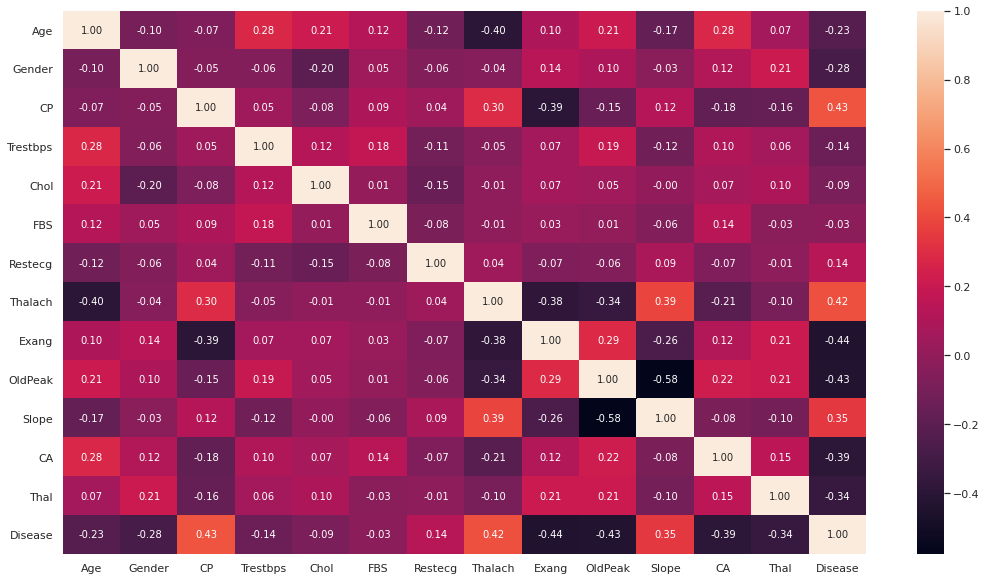

In [43]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')
plt.show()

In [44]:
#checking the variance
df.var()

Age           82.484558
Gender         0.217166
CP             1.065132
Trestbps     307.586453
Chol        2686.426748
FBS            0.126877
Restecg        0.276528
Thalach      524.646406
Exang          0.220707
OldPeak        1.348095
Slope          0.379735
CA             1.045724
Thal           0.374883
Disease        0.248836
dtype: float64

In [45]:
df['Trestbps']=np.log(df['Trestbps'])
df['Chol']=np.log(df['Chol'])
df['Thalach']=np.log(df['Thalach'])

np.var(df[["Trestbps",'Chol','Thalach']])

Trestbps    0.016894
Chol        0.041401
Thalach     0.027054
dtype: float64

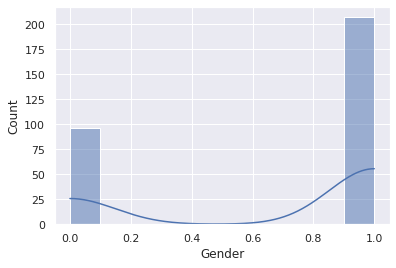

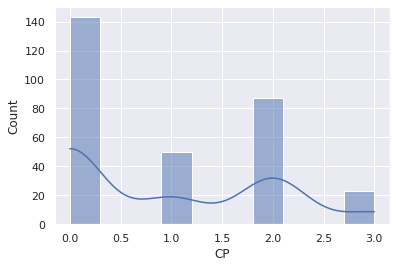

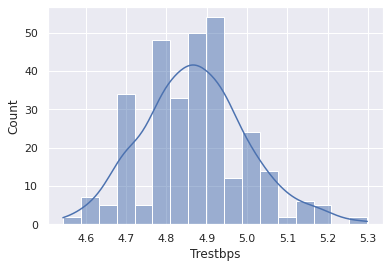

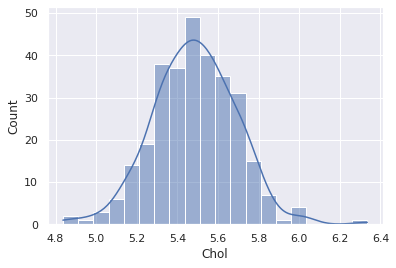

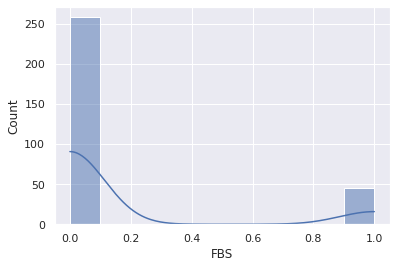

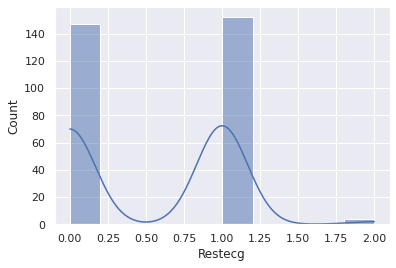

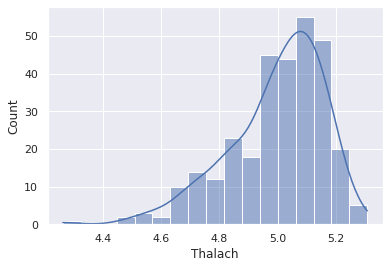

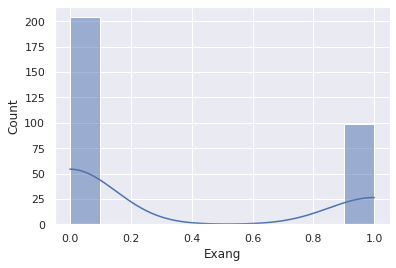

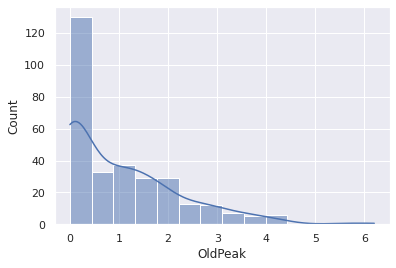

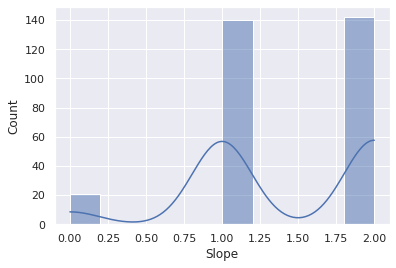

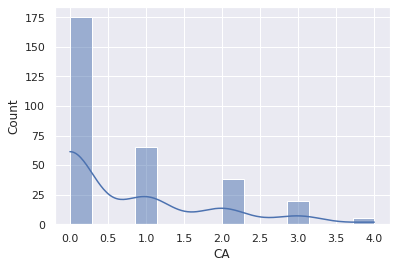

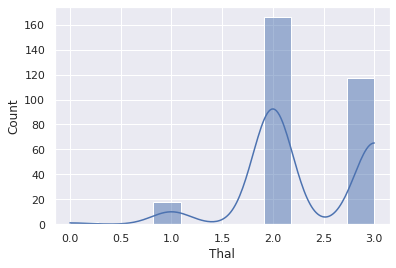

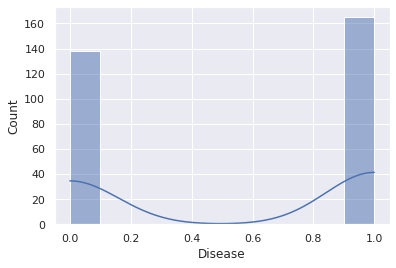

In [46]:
# show distributions
for item in df.columns[1:]:
    plt.figure()
    sns.histplot(df[item], kde = True)

## D) Categorical Data Encoding

In [47]:
for column_name in df.columns:
    print("{} unique values in column : {}".format(column_name, df[column_name].unique()[0:10]))
    print("-" * 30)

Age unique values in column : [63 37 41 56 57 44 52 54 48 49]
------------------------------
Gender unique values in column : [1 0]
------------------------------
CP unique values in column : [3 2 1 0]
------------------------------
Trestbps unique values in column : [4.97673374 4.86753445 4.78749174 4.94164242 5.14749448 5.01063529
 4.70048037 4.90527478 5.07517382 4.65396035]
------------------------------
Chol unique values in column : [5.45103845 5.52146092 5.31811999 5.46383181 5.86929691 5.25749537
 5.68357977 5.57215403 5.29330482 5.12396398]
------------------------------
FBS unique values in column : [1 0]
------------------------------
Restecg unique values in column : [0 1 2]
------------------------------
Thalach unique values in column : [5.01063529 5.23110862 5.14749448 5.18178355 5.0937502  4.99721227
 5.03043792 5.15329159 5.08759634 5.1590553 ]
------------------------------
Exang unique values in column : [0 1]
------------------------------
OldPeak unique values in c

Nominal
* Gender
* FBS
* Exang
* Target

Ordinal
* CA
* CP (Maybe Nominal)
* Restecg
* Slope
* Thal

Continous
* Age
* Trestbps
* Chol
* Thalach
* OldPeak


In [48]:
df.dtypes

Age           int64
Gender        int64
CP            int64
Trestbps    float64
Chol        float64
FBS           int64
Restecg       int64
Thalach     float64
Exang         int64
OldPeak     float64
Slope         int64
CA            int64
Thal          int64
Disease       int64
dtype: object

In [49]:
df.CA = pd.Categorical(df.CA)
df.CP = pd.Categorical(df.CP)
#df.Slope = pd.Categorical(df.Slope)
#df.Restecg = pd.Categorical(df.Restecg)
df.Thal = pd.Categorical(df.Thal)

In [50]:
df.dtypes

Age            int64
Gender         int64
CP          category
Trestbps     float64
Chol         float64
FBS            int64
Restecg        int64
Thalach      float64
Exang          int64
OldPeak      float64
Slope          int64
CA          category
Thal        category
Disease        int64
dtype: object

In [51]:
df2=df
df2.head()

,Age,Gender,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease
0,63,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1
1,37,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1
2,41,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1
3,56,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1
4,57,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1


In [52]:
#Gender = pd.get_dummies(df2['Gender'], prefix='Gender', drop_first=True)
#FBS = pd.get_dummies(df2['FBS'], prefix='FBS', drop_first=True)
#Exang = pd.get_dummies(df2['Exang'], prefix='Exang', drop_first=True)
#Disease = pd.get_dummies(df2['Disease'], prefix='Disease', drop_first=True)

In [53]:
#CA = pd.get_dummies(df2['CA'], prefix='CA', drop_first=True)
CP = pd.get_dummies(df2['CP'], prefix='CP', drop_first=True)
#Slope = pd.get_dummies(df2['Slope'], prefix='Slope', drop_first=True)
#Restecg = pd.get_dummies(df2['Restecg'], prefix='Restecg', drop_first=True)
#Thal = pd.get_dummies(df2['Thal'], prefix='Thal', drop_first=True)

In [54]:
#frames = [df2, Gender, FBS, Exang,Disease]
#df2 = pd.concat(frames, axis = 1)
#df2.head()

In [55]:
frames = [df2, CP] #, CP, Slope,Restecg,Thal
df2 = pd.concat(frames, axis = 1)
df2.head()

,Age,Gender,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease,CP_1,CP_2,CP_3
0,63,1,3,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1,0,0,1
1,37,1,2,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1,0,1,0
2,41,0,1,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1,1,0,0
3,56,1,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1,1,0,0
4,57,0,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1,0,0,0


In [56]:
#df2 = df2.drop(columns = ['Gender', 'FBS', 'Exang'])
#df2.head()

In [57]:
df2 = df2.drop(columns = ['CP']) #, 'CA', 'Slope','Restecg','Thal'
df2.head()

,Age,Gender,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease,CP_1,CP_2,CP_3
0,63,1,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1,0,0,1
1,37,1,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1,0,1,0
2,41,0,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1,1,0,0
3,56,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1,1,0,0
4,57,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1,0,0,0


In [58]:
#%%# Label Encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df2['CA']= label_encoder.fit_transform(df2['CA']) 
#df2['CP']= label_encoder.fit_transform(df2['CP']) 
#df2['Restecg']= label_encoder.fit_transform(df2['Restecg']) 
#df2['Slope']= label_encoder.fit_transform(df2['Slope']) 
df2['Thal']= label_encoder.fit_transform(df2['Thal']) 

#df2['Restecg']= label_encoder.fit_transform(df2['Gender']) 
#df2['Slope']= label_encoder.fit_transform(df2['FBS']) 
#df2['Thal']= label_encoder.fit_transform(df2['Exang']) 
#df2['Restecg']= label_encoder.fit_transform(df2['Disease'])

In [59]:
df2.head()

,Age,Gender,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease,CP_1,CP_2,CP_3
0,63,1,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1,0,0,1
1,37,1,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1,0,1,0
2,41,0,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1,1,0,0
3,56,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1,1,0,0
4,57,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1,0,0,0


## E) Normalization Data

In [60]:
y = df2['Disease']
X = df2.drop(['Disease'], axis = 1)

In [61]:
from sklearn.preprocessing import StandardScaler

# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_df = pd.DataFrame(X_std,columns=X.columns)

In [62]:
df2.head()

,Age,Gender,Trestbps,Chol,FBS,Restecg,Thalach,Exang,OldPeak,Slope,CA,Thal,Disease,CP_1,CP_2,CP_3
0,63,1,4.976734,5.451038,1,0,5.010635,0,2.3,0,0,1,1,0,0,1
1,37,1,4.867534,5.521461,0,1,5.231109,0,3.5,0,0,2,1,0,1,0
2,41,0,4.867534,5.318120,0,0,5.147494,0,1.4,2,0,2,1,1,0,0
3,56,1,4.787492,5.463832,0,1,5.181784,0,0.8,2,0,2,1,1,0,0
4,57,0,4.787492,5.869297,0,1,5.093750,1,0.6,2,0,2,1,0,0,0


In [63]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.708333,1.0,0.574074,0.410173,1.0,0.0,0.715344,0.0,0.370968,0.0,0.0,0.333333,0.0,0.0,1.0
1,0.166667,1.0,0.429444,0.457160,0.0,0.5,0.926205,0.0,0.564516,0.0,0.0,0.666667,0.0,1.0,0.0
2,0.250000,0.0,0.429444,0.321489,0.0,0.0,0.846237,0.0,0.225806,1.0,0.0,0.666667,1.0,0.0,0.0
3,0.562500,1.0,0.323430,0.418709,0.0,0.5,0.879031,0.0,0.129032,1.0,0.0,0.666667,1.0,0.0,0.0
4,0.583333,0.0,0.323430,0.689241,0.0,0.5,0.794836,1.0,0.096774,1.0,0.0,0.666667,0.0,0.0,0.0


## F) Data Split and Check Missing Values

In [64]:
# train test split
from sklearn.model_selection import train_test_split # split dataset
X_train, X_test, y_train, y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [65]:
#check
for i in [X_train, X_test, y_train, y_test]:
    i.index = range(i.shape[0]) 
    print(i.index)

RangeIndex(start=0, stop=212, step=1)
RangeIndex(start=0, stop=91, step=1)
RangeIndex(start=0, stop=212, step=1)
RangeIndex(start=0, stop=91, step=1)


In [66]:
#summarize missing values - X_train
X_train.isnull().sum()

Age         0
Gender      0
Trestbps    0
Chol        0
FBS         0
Restecg     0
Thalach     0
Exang       0
OldPeak     0
Slope       0
CA          0
Thal        0
CP_1        0
CP_2        0
CP_3        0
dtype: int64

In [67]:
#summarize missing values - y_train
y_train.isnull().sum()

0

In [68]:
#summarize missing values - X_test
X_test.isnull().sum()

Age         0
Gender      0
Trestbps    0
Chol        0
FBS         0
Restecg     0
Thalach     0
Exang       0
OldPeak     0
Slope       0
CA          0
Thal        0
CP_1        0
CP_2        0
CP_3        0
dtype: int64

In [69]:
#summarize missing values - y_test
y_test.isnull().sum()

0

In [70]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
207    0
208    1
209    1
210    0
211    1
Name: Disease, Length: 212, dtype: int64

##  I) Applying Supervised Machine Learning Algorithms

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
      
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")

### Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

logisticreg = LogisticRegression(solver='liblinear')
logisticreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:

test_score_logic = accuracy_score(y_test, logisticreg.predict(X_test)) * 100
train_score = accuracy_score(y_train, logisticreg.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score_logic]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.21978


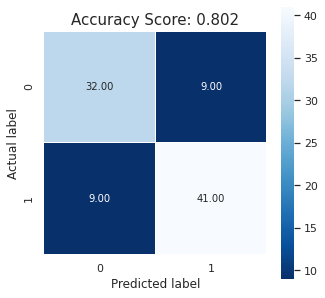

In [74]:
from sklearn import metrics

predictionsreg = logisticreg.predict(X_test)
score = logisticreg.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsreg)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

In [75]:
print_score(logisticreg, X_train, y_train, X_test, y_test, train=True)
print_score(logisticreg, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 84.43%
			Recall Score: 89.57%
			F1 score: 86.92%
Test Result:

Accuracy Score: 80.22%
_______________________________________________
Classification Report:	Precision Score: 82.00%
			Recall Score: 82.00%
			F1 score: 82.00%


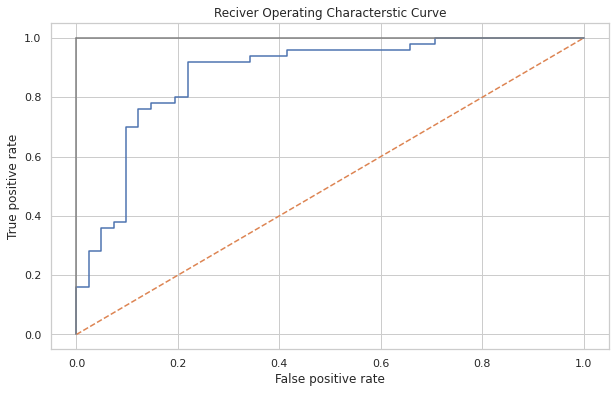

In [76]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_log = logisticreg.predict_proba(X_test)[:,1]
#Create true and false positive rates
log_false_positive_rate,log_true_positive_rate,log_threshold = roc_curve(y_test,
                                                             target_probailities_log)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [77]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_log)

0.8775609756097561

### Support Vector Machine

Using **' rbf '** kernel 

In [78]:
from sklearn.svm import SVC

SVM = SVC(kernel='rbf', gamma=0.1, C=1.0 ,probability=True)
SVM.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [79]:

print_score(SVM, X_train, y_train, X_test, y_test, train=True)
print_score(SVM, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 94.34%
_______________________________________________
Classification Report:	Precision Score: 94.78%
			Recall Score: 94.78%
			F1 score: 94.78%
Test Result:

Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 82.69%
			Recall Score: 86.00%
			F1 score: 84.31%


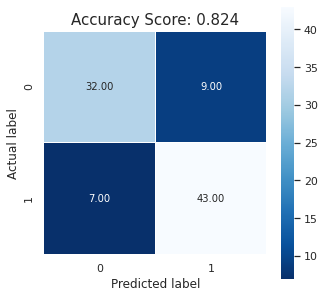

In [80]:
predictionsSVM = SVM.predict(X_test)
score = SVM.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsSVM)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

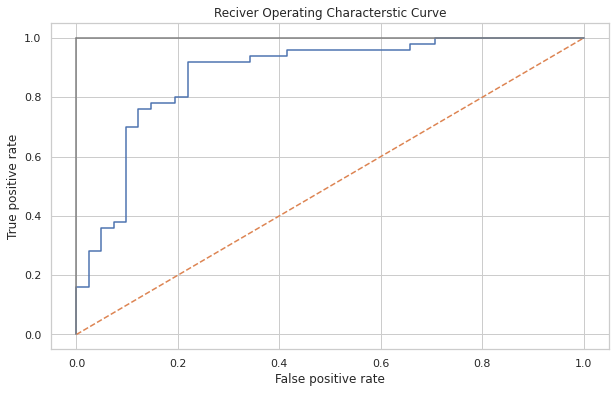

In [81]:

from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_SVM = SVM.predict_proba(X_test)[:,1]
#Create true and false positive rates
SVM_false_positive_rate,SVM_true_positive_rate,SVM_threshold = roc_curve(y_test,
                                                             target_probailities_SVM)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(log_false_positive_rate,log_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [82]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_SVM)

0.8663414634146341

In [83]:
test_score_svm = accuracy_score(y_test, SVM.predict(X_test)) * 100
train_score = accuracy_score(y_train, SVM.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score_svm]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Decision Tree Classifier

In [84]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 71.43%
_______________________________________________
Classification Report:	Precision Score: 78.57%
			Recall Score: 66.00%
			F1 score: 71.74%


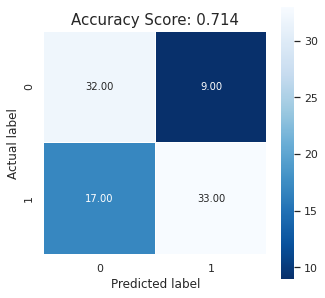

In [85]:

predictions = tree.predict(X_test)
score = tree.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

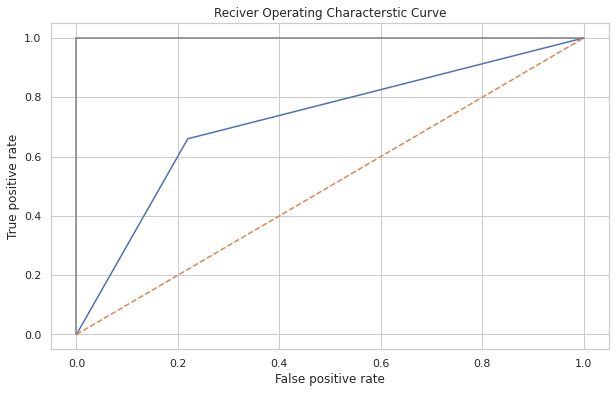

In [86]:

from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_tree = tree.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [87]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_tree)

0.7202439024390246

In [88]:

test_score_dct = accuracy_score(y_test, tree.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score_dct]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Decision Tree Classifier Hyperparameter Tuning

In [89]:
from sklearn.model_selection import GridSearchCV

params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}\n')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 904 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 10504 tasks      | elapsed:   23.9s


Best_params: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2, 'splitter': 'best'}

Train Result:

Accuracy Score: 87.74%
_______________________________________________
Classification Report:	Precision Score: 92.38%
			Recall Score: 84.35%
			F1 score: 88.18%
Test Result:

Accuracy Score: 73.63%
_______________________________________________
Classification Report:	Precision Score: 84.21%
			Recall Score: 64.00%
			F1 score: 72.73%


[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:   29.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:   29.1s finished


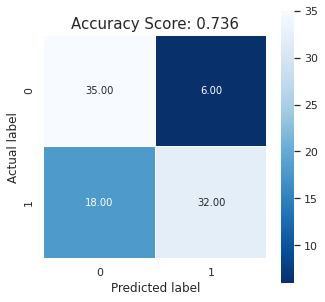

In [90]:
from sklearn import metrics

predictionsreg = tree_clf.predict(X_test)
score = tree_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsreg)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

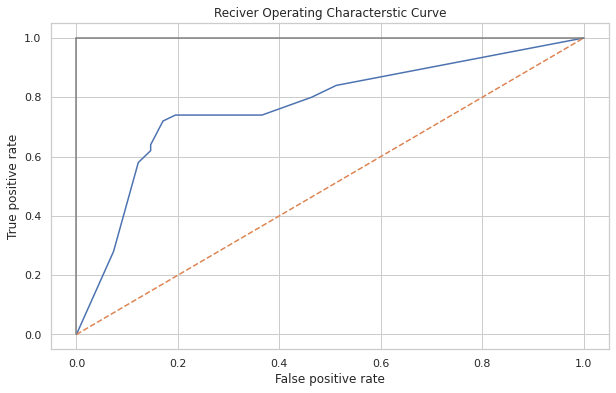

In [91]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_tree_hyper = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
tree_false_positive_rate,tree_true_positive_rate,tree_threshold = roc_curve(y_test,
                                                             target_probailities_tree_hyper)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(tree_false_positive_rate,tree_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [92]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_tree_hyper)

0.7704878048780488

In [93]:
test_score_dct_hpt = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score2 = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier ( HyperParameter Tuning )", train_score2, test_score_dct_hpt]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

In [94]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374


### Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

randomforest = RandomForestClassifier(n_estimators=100, random_state=0)
randomforest.fit(X_train, y_train)

print_score(randomforest, X_train, y_train, X_test, y_test, train=True)
print_score(randomforest, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 80.22%
_______________________________________________
Classification Report:	Precision Score: 83.33%
			Recall Score: 80.00%
			F1 score: 81.63%


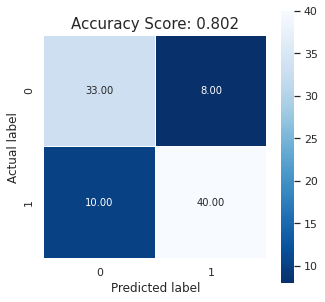

In [96]:
predictionsrandomforest = randomforest.predict(X_test)
score = randomforest.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsrandomforest)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

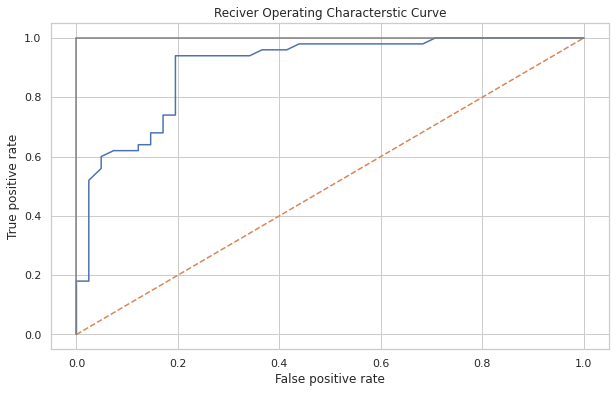

In [97]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_rnfr = randomforest.predict_proba(X_test)[:,1]
#Create true and false positive rates
rnd_false_positive_rate,rnd_true_positive_rate,rnd_threshold = roc_curve(y_test,
                                                             target_probailities_rnfr)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rnd_false_positive_rate,rnd_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [98]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_rnfr)

0.8999999999999999

In [99]:
test_score_rndfr = accuracy_score(y_test, randomforest.predict(X_test)) * 100
train_score = accuracy_score(y_train, randomforest.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score_rndfr]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Random Forest HyperParameter Tuning

In [100]:
# RFC Parameters tunning 
RFC = RandomForestClassifier(random_state = 42)

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "min_samples_split": [2, 6, 20],
              "min_samples_leaf": [1, 4, 16],
              "n_estimators" :[100,200,300,400],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid = rf_param_grid, cv=10,
                     scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,y_train)
RFC_best = gsRFC.best_params_


Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   12.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   53.0s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  1.6min finished


In [101]:
random_clf = RandomForestClassifier(**RFC_best)
random_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=16, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
print_score(random_clf, X_train, y_train, X_test, y_test, train=True)
print_score(random_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 84.43%
			Recall Score: 89.57%
			F1 score: 86.92%
Test Result:

Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 83.33%
			Recall Score: 90.00%
			F1 score: 86.54%


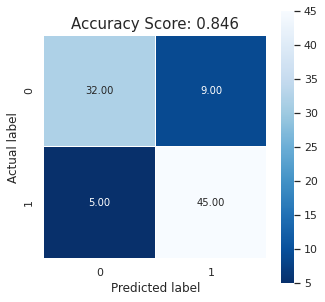

In [103]:
predictionsrandomforest = random_clf.predict(X_test)
score = random_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsrandomforest)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

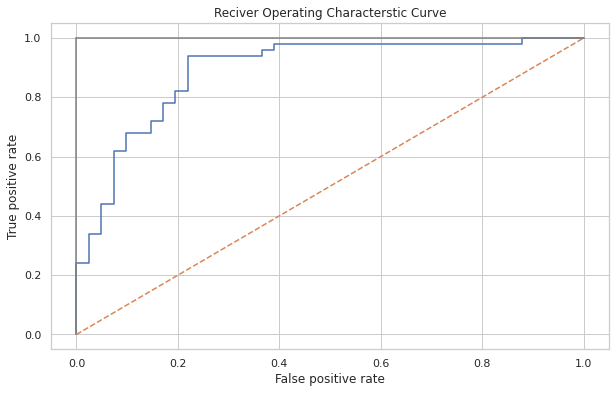

In [104]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_rnf_hyper = random_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
rnd_false_positive_rate,rnd_true_positive_rate,rnd_threshold = roc_curve(y_test,
                                                             target_probailities_rnf_hyper)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rnd_false_positive_rate,rnd_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [105]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_rnf_hyper)

0.8907317073170732

In [106]:
test_score_rdn_hpt = accuracy_score(y_test, random_clf.predict(X_test)) * 100
train_score2 = accuracy_score(y_train, random_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier ( HyperParameter Tuning )", train_score2, test_score_rdn_hpt]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df= results_df.append(results_df_2, ignore_index=True)

In [107]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385


### KNN 

In [108]:
# training and predicting
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [109]:
print_score(knn, X_train, y_train, X_test, y_test, train=True)
print_score(knn, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 87.26%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 76.52%
			F1 score: 86.70%
Test Result:

Accuracy Score: 70.33%
_______________________________________________
Classification Report:	Precision Score: 84.85%
			Recall Score: 56.00%
			F1 score: 67.47%


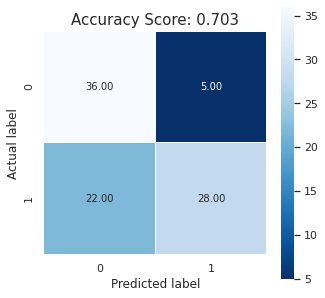

In [110]:

predictionsknn = knn.predict(X_test)
score = knn.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsknn)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

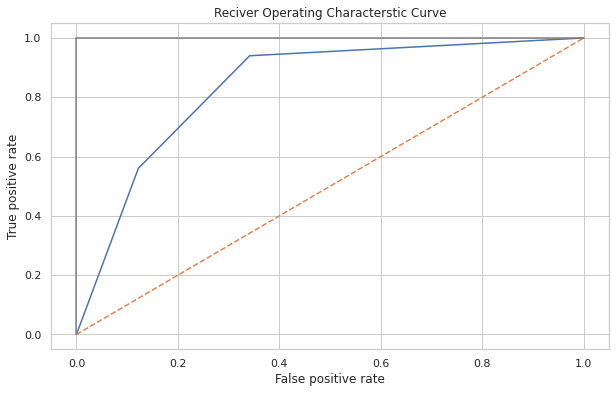

In [111]:

from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_knn = knn.predict_proba(X_test)[:,1]
#Create true and false positive rates
rnd_false_positive_rate,rnd_true_positive_rate,rnd_threshold = roc_curve(y_test,
                                                             target_probailities_knn)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(rnd_false_positive_rate,rnd_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [112]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_knn)

0.8375609756097561

In [113]:
test_score_knn = accuracy_score(y_test, knn.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K Nearest Neighbour (KNN) ", train_score, test_score_knn]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### XGBoost 

In [114]:
from xgboost import XGBClassifier
from sklearn import metrics
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
preds = xgb.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8131868131868132

In [115]:
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss
from sklearn.metrics import (confusion_matrix, accuracy_score) 
from sklearn.metrics import plot_confusion_matrix


 XGBOOST :
Accuracy: 98.58
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        97
           1       0.98      0.99      0.99       115

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212

Confusion Matrix:


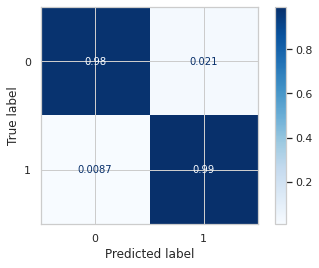

In [116]:
print('\n XGBOOST :')
predictions = xgb.predict(X_train)
xgb_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(xgb_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()


 XGBOOST :
Accuracy: 81.32
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        41
           1       0.85      0.80      0.82        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

Confusion Matrix:


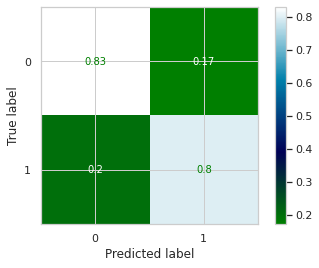

In [117]:
print('\n XGBOOST :')
predictions = xgb.predict(X_test)
xgboost_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(xgboost_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_test, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

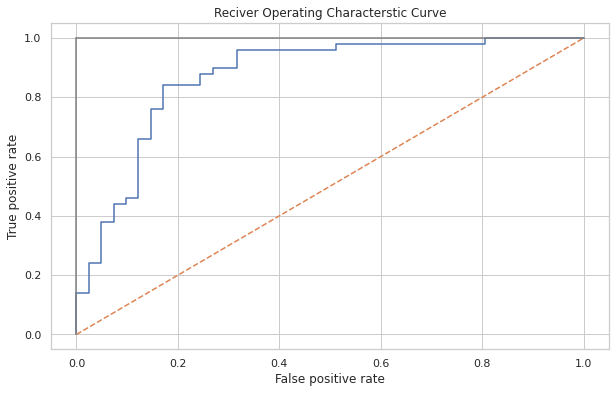

In [118]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_boosting = xgb.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_boosting)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [119]:

#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_boosting)

0.871219512195122

In [120]:
test_score_xgb = accuracy_score(y_test, xgb.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBOOST ", train_score, test_score_xgb]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### XGBOOST HyperParameter Tuning

In [121]:
from sklearn.model_selection import GridSearchCV
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42,
    tree_method='gpu_hist', gpu_id=0
)
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

grid_search.fit(X_train, y_train)
#grid_search.best_estimator_
xgboost_best= grid_search.best_params_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 11.5min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed: 14.1min finished


In [122]:
xgboost_clf = XGBClassifier(**xgboost_best)
xgboost_clf.fit(X_train, y_train)

print_score(xgboost_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgboost_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 88.21%
_______________________________________________
Classification Report:	Precision Score: 89.47%
			Recall Score: 88.70%
			F1 score: 89.08%
Test Result:

Accuracy Score: 76.92%
_______________________________________________
Classification Report:	Precision Score: 82.22%
			Recall Score: 74.00%
			F1 score: 77.89%



 XGBOOST :
Accuracy: 88.21
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212

Confusion Matrix:


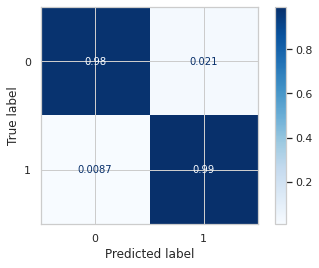

In [123]:
print('\n XGBOOST :')
predictions = xgboost_clf.predict(X_train)
xgb_train_accuracy = sklearn.metrics.accuracy_score(y_train, predictions)
print('Accuracy: {0:.2f}'.format(xgb_train_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_train, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_train, y_train, cmap=plt.cm.Blues, normalize='true')
plt.show()


 XGBOOST :
Accuracy: 76.92
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.76        41
           1       0.82      0.74      0.78        50

    accuracy                           0.77        91
   macro avg       0.77      0.77      0.77        91
weighted avg       0.77      0.77      0.77        91

Confusion Matrix:


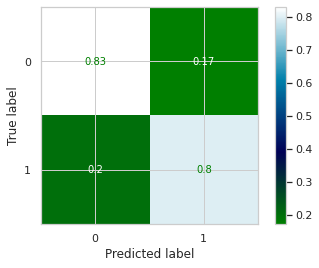

In [124]:
print('\n XGBOOST :')
predictions = xgboost_clf.predict(X_test)
xgboost_test_accuracy = sklearn.metrics.accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(xgboost_test_accuracy * 100.0))
print('Classification Report:')
print(sklearn.metrics.classification_report(y_test, predictions))
print('Confusion Matrix:')
plot_confusion_matrix(xgb,X_test, y_test, cmap=plt.cm.ocean, normalize='true')
plt.show()

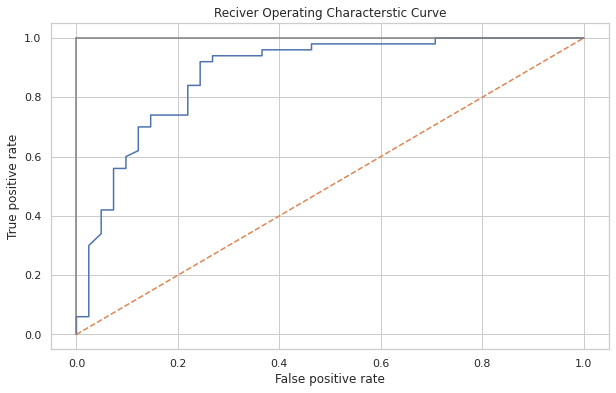

In [125]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_boosting_hyper = xgboost_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_boosting_hyper)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [126]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_boosting_hyper)

0.8792682926829268

#### Table

In [127]:
test_score2_xgb_grid = accuracy_score(y_test, grid_search.predict(X_test)) * 100
train_score2 = accuracy_score(y_train, grid_search.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBOOST (HyperParameter Tuning) ", train_score2, test_score2_xgb_grid]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

In [128]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385
6,K Nearest Neighbour (KNN),87.264151,70.329670
7,XGBOOST,98.584906,81.318681
8,XGBOOST (HyperParameter Tuning),88.207547,76.923077


### LightGBM 

In [129]:
#!pip install lightgbm

In [130]:
import lightgbm as lgbm

In [131]:
lgbm_model = lgbm.LGBMClassifier()

In [132]:
lgbm_params = {
    "n_estimators":[10,100,1000,2000],
    'boosting_type': ['dart','gbdt'],          
    'learning_rate': [0.05,0.1,0.2],       
    'min_split_gain': [0.0,0.1,0.5,0.7],     
    'min_child_weight': [0.001,0.003,0.01],     
    'num_leaves': [10,21,41,61],            
    'min_child_samples': [10,20,30,60,100]
}

In [133]:
lgbm_model = lgbm.LGBMClassifier()

In [134]:
lgbm_c = RandomizedSearchCV(param_distributions=lgbm_params, 
                                    estimator = lgbm_model, scoring = "accuracy", 
                                    verbose = 0, n_iter = 100, cv = 10)

In [135]:
lgbm_c.fit(X_train,y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_state=None, reg_alpha=0.0,
                                            reg_lambda=0.0, sil...
                   param_distributions={'boosting_type': ['dart', 'gbdt'],
                                        'learning_

In [136]:
lgbm_bp =lgbm_c.best_params_

In [137]:
lgbm_model = lgbm.LGBMClassifier(num_leaves=lgbm_bp["num_leaves"],
                                 n_estimators=lgbm_bp["n_estimators"],
                                 min_split_gain=lgbm_bp["min_split_gain"],
                                 min_child_weight=lgbm_bp["min_child_weight"],
                                 min_child_samples=lgbm_bp["min_child_samples"],
                                 learning_rate=lgbm_bp["learning_rate"],
                                 boosting_type=lgbm_bp["boosting_type"])

In [138]:
lgbm_model.fit(X_train,y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=-1,
               min_child_samples=60, min_child_weight=0.01, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=41, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [139]:
light_clf = lgbm.LGBMClassifier(**lgbm_bp)
light_clf.fit(X_train, y_train)

print_score(light_clf, X_train, y_train, X_test, y_test, train=True)
print_score(light_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 88.21%
_______________________________________________
Classification Report:	Precision Score: 88.79%
			Recall Score: 89.57%
			F1 score: 89.18%
Test Result:

Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 84.00%
			F1 score: 84.85%


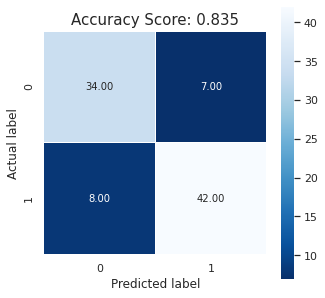

In [140]:
predictionslight = light_clf.predict(X_test)
score = light_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionslight)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

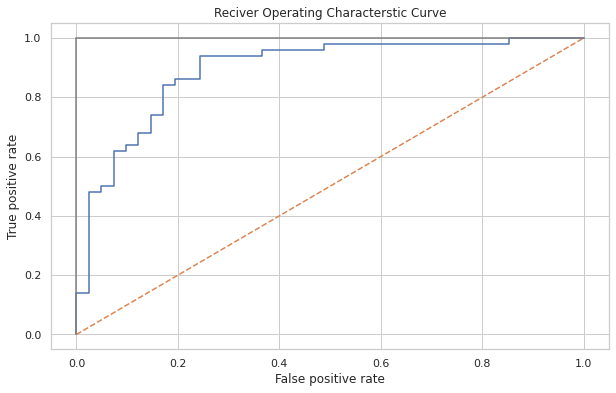

In [141]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_lghtgbm_hyper = light_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_lghtgbm_hyper)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [142]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_lghtgbm_hyper)

0.8917073170731707

In [143]:
test_score_light = accuracy_score(y_test, light_clf.predict(X_test)) * 100
train_score2 = accuracy_score(y_train, light_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LightGBM (HyperParameter) ", train_score2, test_score_light]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

In [144]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385
6,K Nearest Neighbour (KNN),87.264151,70.329670
7,XGBOOST,98.584906,81.318681
8,XGBOOST (HyperParameter Tuning),88.207547,76.923077
9,LightGBM (HyperParameter),88.207547,83.516484


### LightGBM with GridSearchCV

In [145]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

In [146]:
model = LGBMClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.8131868131868132

In [147]:
params = {"learning_rate" : [0.001, 0.01, 0.1],
          "n_estimators" : [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
          "max_depth" : [2, 3, 4, 5, 6, 7, 8, 9, 10]}

model = LGBMClassifier()
model_cv = GridSearchCV(model, params, cv = 10, n_jobs = -1, verbose = 0)
model_cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=None, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_dep

In [148]:
light_best = model_cv.best_params_

In [149]:
model_tuned = LGBMClassifier(learning_rate = 0.1, max_depth = 9, n_estimators = 300).fit(X_train, y_train)
y_pred = model_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.8131868131868132

In [150]:
lgbm_clf = LGBMClassifier(**light_best)
lgbm_clf.fit(X_train, y_train)

print_score(lgbm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lgbm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 88.68%
_______________________________________________
Classification Report:	Precision Score: 88.89%
			Recall Score: 90.43%
			F1 score: 89.66%
Test Result:

Accuracy Score: 76.92%
_______________________________________________
Classification Report:	Precision Score: 82.22%
			Recall Score: 74.00%
			F1 score: 77.89%


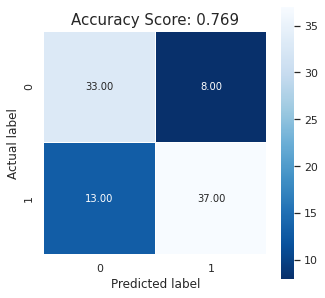

In [151]:
predictionslight = lgbm_clf.predict(X_test)
score = lgbm_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionslight)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

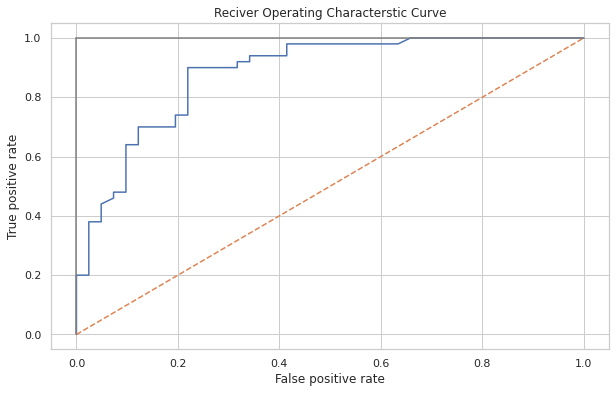

In [152]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_lghtgbm_cv = lgbm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_lghtgbm_cv)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [153]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_lghtgbm_cv)

0.8814634146341463

In [154]:

test_score_light_cv = accuracy_score(y_test, lgbm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lgbm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["LightGBM (GridSearchCV)", train_score, test_score_light_cv]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### ADABoost

In [155]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

ada = AdaBoostClassifier()
ada.fit(X_train,y_train) # learning

print_score(ada, X_train, y_train, X_test, y_test, train=True)
print_score(ada, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 94.81%
_______________________________________________
Classification Report:	Precision Score: 94.83%
			Recall Score: 95.65%
			F1 score: 95.24%
Test Result:

Accuracy Score: 78.02%
_______________________________________________
Classification Report:	Precision Score: 84.09%
			Recall Score: 74.00%
			F1 score: 78.72%


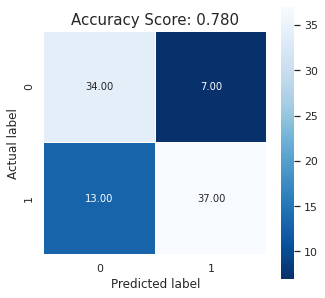

In [156]:
predictionsada = ada.predict(X_test)
score = ada.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsada)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

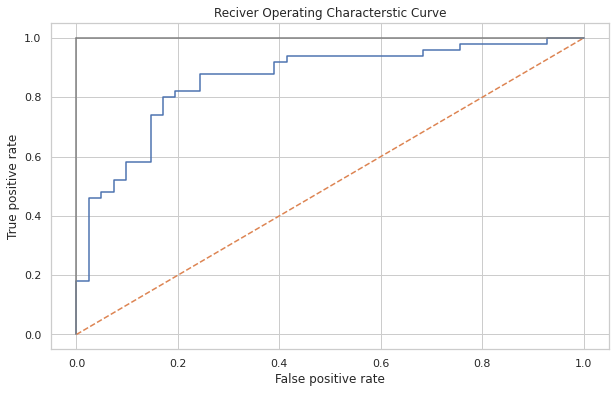

In [157]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_ada = ada.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_ada)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [158]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_ada)

0.86

In [159]:
test_score_ada = accuracy_score(y_test, ada.predict(X_test)) * 100
train_score = accuracy_score(y_train, ada.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ADABOOST", train_score, test_score_ada]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

In [160]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385
6,K Nearest Neighbour (KNN),87.264151,70.329670
7,XGBOOST,98.584906,81.318681
8,XGBOOST (HyperParameter Tuning),88.207547,76.923077
9,LightGBM (HyperParameter),88.207547,83.516484


### ADABoost HyperParamater

In [161]:
from sklearn.ensemble import AdaBoostClassifier

In [162]:
 
parameters = {
    "n_estimators": [10, 100, 200, 250],
    "learning_rate": [0.001,0.01, 0.1, 0.2, 0.5]
}

adaboost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4), random_state=42)
adaboost_grid = GridSearchCV(adaboost, parameters, cv=10)
adaboost_grid.fit(X_train, y_train)

# summarize the results of the grid search
ada_best = adaboost_grid.best_params_

In [163]:
ada_clf = AdaBoostClassifier(**ada_best)
ada_clf.fit(X_train, y_train)

print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 96.70%
_______________________________________________
Classification Report:	Precision Score: 95.76%
			Recall Score: 98.26%
			F1 score: 97.00%
Test Result:

Accuracy Score: 73.63%
_______________________________________________
Classification Report:	Precision Score: 82.50%
			Recall Score: 66.00%
			F1 score: 73.33%


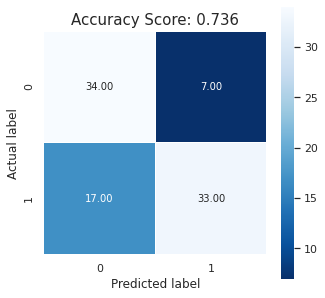

In [164]:
predictionsada_hyper = ada_clf.predict(X_test)
score = ada_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsada_hyper)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

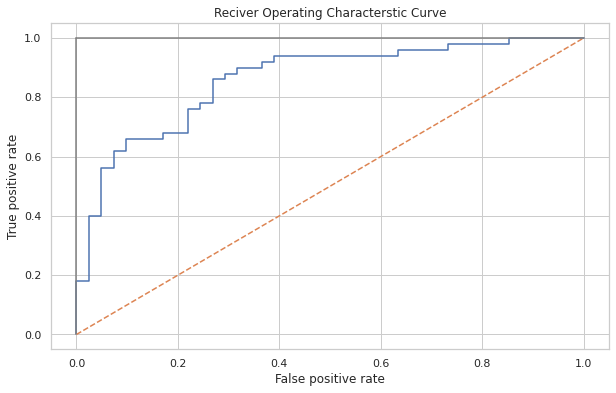

In [165]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_ada_clf = ada_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_ada_clf)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [166]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_ada_clf)

0.8595121951219512

In [167]:

test_score_ada_hpt = accuracy_score(y_test, ada_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, ada_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["ADABOOST (HyperParameter) ", train_score, test_score_ada_hpt]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Gradiant Boosting

In [168]:
from sklearn.ensemble import GradientBoostingClassifier


In [169]:
parameters = {
    "min_samples_split": [0.01,0.05,0.1,0.2],
    "max_depth":[1,2,3],
}

gbc_grid = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1)
gbc_grid.fit(X_train, y_train)

# summarize the results of the grid search
gra_best = gbc_grid.best_params_

In [170]:
gra_clf = GradientBoostingClassifier(**gra_best)
gra_clf.fit(X_train, y_train)

print_score(gra_clf, X_train, y_train, X_test, y_test, train=True)
print_score(gra_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 88.21%
_______________________________________________
Classification Report:	Precision Score: 88.14%
			Recall Score: 90.43%
			F1 score: 89.27%
Test Result:

Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 82.69%
			Recall Score: 86.00%
			F1 score: 84.31%


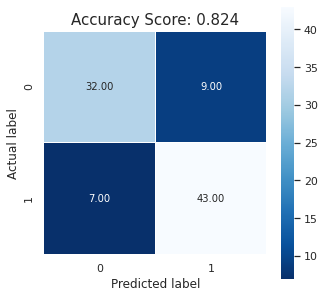

In [171]:
predictionsgra = gra_clf.predict(X_test)
score = gra_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsgra)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

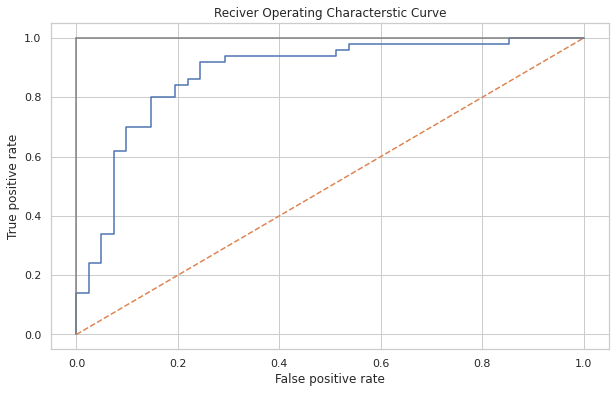

In [172]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_gra = gra_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_gra)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [173]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_gra)

0.8790243902439023

In [174]:
test_score_gra = accuracy_score(y_test, gra_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, gra_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Gradiant Boosting", train_score, test_score_gra]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Bagging Classifier

In [175]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import BaggingClassifier

In [176]:
pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=42))

# Fit the model
pipeline.fit(X_train, y_train)

# Model scores on test and training data
print('Model test Score: %.3f, ' %pipeline.score(X_test, y_test),
      'Model training Score: %.3f' %pipeline.score(X_train, y_train))

Model test Score: 0.802,  Model training Score: 0.858


In [177]:

# Pipeline Estimator

pipeline = make_pipeline(StandardScaler(),
                        LogisticRegression(random_state=42))

# Instantiate the bagging classifier
bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
                                 max_features=10,
                                 max_samples=100,
                                 random_state=1, n_jobs=-1)
# Fit the bagging classifier
bgclassifier.fit(X_train, y_train)

BaggingClassifier(base_estimator=Pipeline(memory=None,
                                          steps=[('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True)),
                                                 ('logisticregression',
                                                  LogisticRegression(C=1.0,
                                                                     class_weight=None,
                                                                     dual=False,
                                                                     fit_intercept=True,
                                                                     intercept_scaling=1,
                                                                     l1_ratio=None,
                                                          

In [178]:
print_score(bgclassifier, X_train, y_train, X_test, y_test, train=True)
print_score(bgclassifier, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 85.38%
_______________________________________________
Classification Report:	Precision Score: 83.87%
			Recall Score: 90.43%
			F1 score: 87.03%
Test Result:

Accuracy Score: 83.52%
_______________________________________________
Classification Report:	Precision Score: 84.31%
			Recall Score: 86.00%
			F1 score: 85.15%


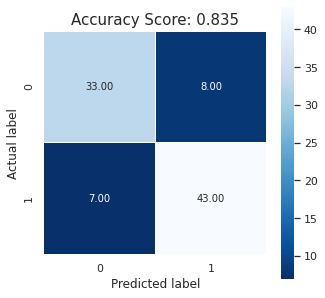

In [179]:
predictionsbag = bgclassifier.predict(X_test)
score = bgclassifier.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsbag)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

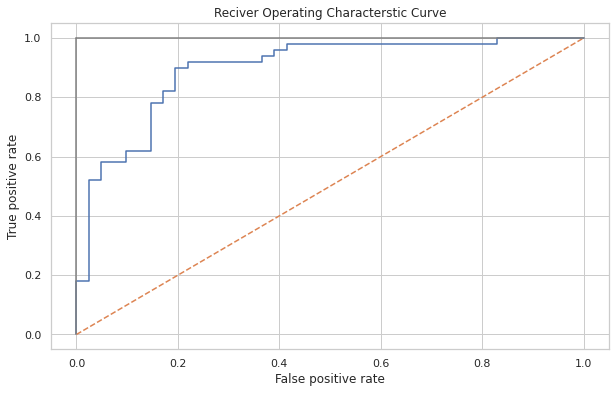

In [180]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_bag = bgclassifier.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_bag)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [181]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_bag)

0.8946341463414634

In [182]:
test_score_bg = accuracy_score(y_test, bgclassifier.predict(X_test)) * 100
train_score = accuracy_score(y_train, bgclassifier.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Bagging Classifier (LogisticRegression)", train_score, test_score_bg]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Bagging Classifier ( Decision Tree Classifier)

In [183]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model_bag=BaggingClassifier(tree.DecisionTreeClassifier(random_state=42))
model_bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [184]:
print_score(model_bag, X_train, y_train, X_test, y_test, train=True)
print_score(model_bag, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 98.58%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 97.39%
			F1 score: 98.68%
Test Result:

Accuracy Score: 73.63%
_______________________________________________
Classification Report:	Precision Score: 84.21%
			Recall Score: 64.00%
			F1 score: 72.73%


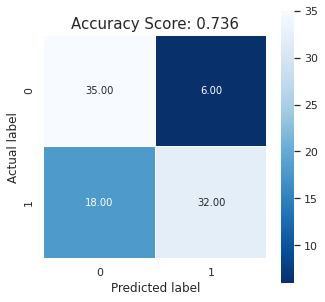

In [185]:
predictionsbag = model_bag.predict(X_test)
score = model_bag.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsbag)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

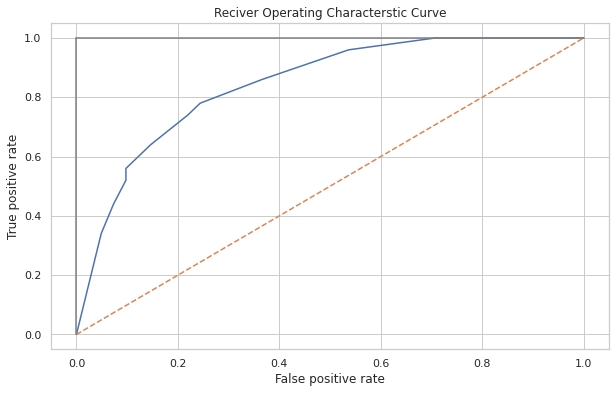

In [186]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_bag_dt = model_bag.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_bag_dt)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [187]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_bag_dt)

0.843170731707317

In [188]:
test_score_bg_dct = accuracy_score(y_test, model_bag.predict(X_test)) * 100
train_score = accuracy_score(y_train, model_bag.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Bagging Classifier (Decision Tree Classifier)", train_score, test_score_bg_dct]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Bagging Classifier (SVC)

In [189]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(SVC(gamma='scale', probability=True, random_state=42),
                                bootstrap=True, # set to False to use Pasting instead of Bagging
                                n_estimators=100, # number of SVC models to create
                                max_samples=100, # each model is trained from randomly sampled 100 instances 
                                random_state=42
                               )
bagging_clf.fit(X_train, y_train) # training
y_pred_bagging = bagging_clf.predict(X_test) # predicting
accuracy_score(y_test, y_pred_bagging) # evaluating


0.8461538461538461

In [190]:
print_score(bagging_clf, X_train, y_train, X_test, y_test, train=True)
print_score(bagging_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 90.09%
_______________________________________________
Classification Report:	Precision Score: 90.52%
			Recall Score: 91.30%
			F1 score: 90.91%
Test Result:

Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%


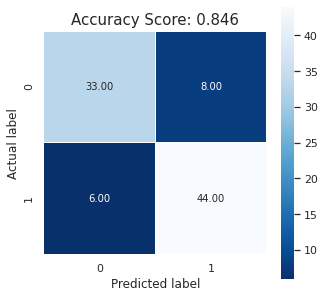

In [191]:
predictions_bagging = bagging_clf.predict(X_test)
score = bagging_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions_bagging)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

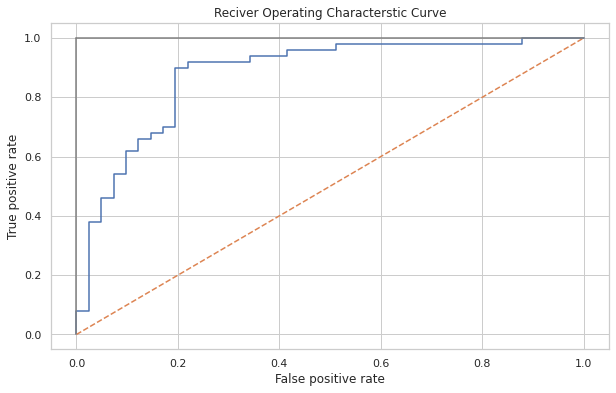

In [192]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_bagging= bagging_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_bagging)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [193]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_bagging)

0.8775609756097561

In [194]:
test_score_bag_svc = accuracy_score(y_test, bagging_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, bagging_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Bagging Classifier (SVC)", train_score, test_score_bag_svc]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Extra Trees Parameters

In [195]:
from sklearn.ensemble import ExtraTreesClassifier

In [196]:
extra_clf = ExtraTreesClassifier(n_estimators=100, n_jobs=-1,max_depth =8,min_samples_leaf = 3,verbose =0)

In [197]:
extra_clf.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=8, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=3, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [198]:
clf_pred = extra_clf.predict(X_test)
acc_score = metrics.accuracy_score(y_test, clf_pred)
acc_score

0.8461538461538461

In [199]:
clf_pred2 = extra_clf.predict(X_train)
acc_score2 = metrics.accuracy_score(y_train, clf_pred2)
acc_score2

0.9292452830188679

In [200]:

print_score(extra_clf, X_train, y_train, X_test, y_test, train=True)
print_score(extra_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 92.92%
_______________________________________________
Classification Report:	Precision Score: 93.10%
			Recall Score: 93.91%
			F1 score: 93.51%
Test Result:

Accuracy Score: 84.62%
_______________________________________________
Classification Report:	Precision Score: 84.62%
			Recall Score: 88.00%
			F1 score: 86.27%


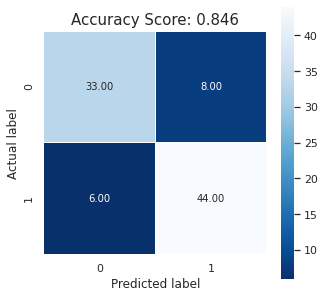

In [201]:
predictions_extree = extra_clf.predict(X_test)
score = extra_clf.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictions_extree)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

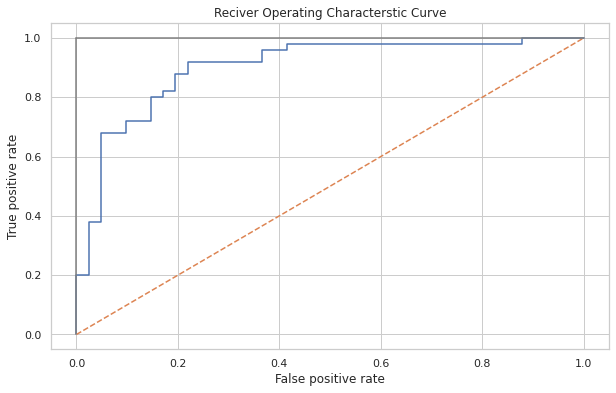

In [202]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_extree = extra_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
boost_false_positive_rate,boost_true_positive_rate,boost_threshold = roc_curve(y_test,
                                                             target_probailities_extree)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(boost_false_positive_rate,boost_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [203]:
#Calculate area under the curve (AUC)
roc_auc_score(y_test,target_probailities_extree)

0.9009756097560976

In [204]:
test_score_extree = accuracy_score(y_test, extra_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, extra_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Extra Tree Classifier", train_score, test_score_extree]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

### Artificial Neural Network - ANN (MLP Classifier)

In [205]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
       learning_rate_init=0.01, max_iter=300, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=42,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
ANN.fit(X_train,y_train)

predictionsANN = ANN.predict(X_test)
print_score(ANN, X_train, y_train, X_test, y_test, train=True)
print_score(ANN, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
Test Result:

Accuracy Score: 82.42%
_______________________________________________
Classification Report:	Precision Score: 85.42%
			Recall Score: 82.00%
			F1 score: 83.67%


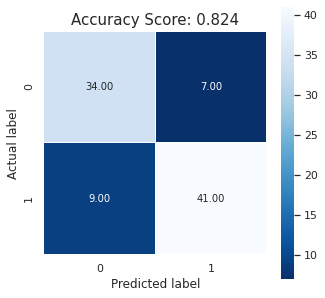

In [206]:
score = ANN.score(X_test, y_test)
cm = metrics.confusion_matrix(y_test, predictionsANN)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

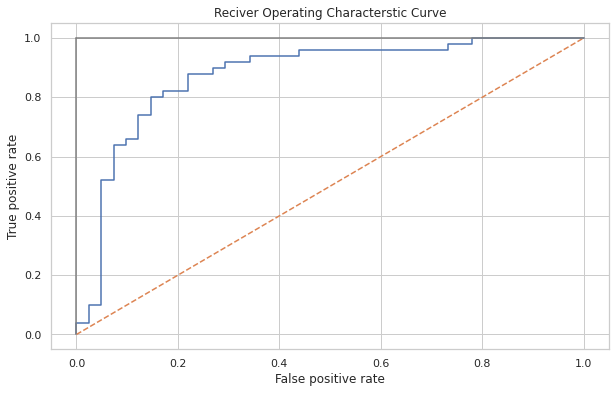

In [207]:
from sklearn.metrics import roc_auc_score,roc_curve
#Get predicted probabilites
target_probailities_ANN = ANN.predict_proba(X_test)[:,1]
#Create true and false positive rates
ANN_false_positive_rate,ANN_true_positive_rate,ANN_threshold = roc_curve(y_test,
                                                             target_probailities_ANN)
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')
plt.plot(ANN_false_positive_rate,ANN_true_positive_rate)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.show()

In [208]:
roc_auc_score(y_test,target_probailities_ANN)

0.8751219512195122

In [209]:
test_score_ann_mlp = accuracy_score(y_test,ANN.predict(X_test)) * 100
train_score = accuracy_score(y_train, ANN.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Artificial neural network", train_score, test_score_ann_mlp]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)

In [210]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385
6,K Nearest Neighbour (KNN),87.264151,70.329670
7,XGBOOST,98.584906,81.318681
8,XGBOOST (HyperParameter Tuning),88.207547,76.923077
9,LightGBM (HyperParameter),88.207547,83.516484


### Comparing Models

In [211]:
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.377358,80.219780
1,Support Vector Machine,94.339623,82.417582
2,Decision Tree Classifier,100.000000,71.428571
3,Decision Tree Classifier ( HyperParameter Tuni...,87.735849,73.626374
4,Random Forest Classifier,100.000000,80.219780
5,Random Forest Classifier ( HyperParameter Tuni...,85.377358,84.615385
6,K Nearest Neighbour (KNN),87.264151,70.329670
7,XGBOOST,98.584906,81.318681
8,XGBOOST (HyperParameter Tuning),88.207547,76.923077
9,LightGBM (HyperParameter),88.207547,83.516484


In [212]:
#logistic regression
auc_score=roc_auc_score(y_test,target_probailities_log)
auc = pd.DataFrame(data=[["Logistic Regression",auc_score ]], 
                          columns=['Model', 'AUC'])
#SVM
auc_score=roc_auc_score(y_test,target_probailities_SVM)
auc_2=pd.DataFrame(data=[["Support Vector Machine",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)

#tree
auc_score=roc_auc_score(y_test,target_probailities_tree)
auc_2=pd.DataFrame(data=[["Decision Tree Classifier ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# tree hyper parameter
auc_score=roc_auc_score(y_test,target_probailities_tree_hyper)
auc_2=pd.DataFrame(data=[["Decision Tree Classifier Hyperparameter Tuning ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)

# random forest 
auc_score=roc_auc_score(y_test,target_probailities_rnfr)
auc_2=pd.DataFrame(data=[["Random Forest classifier ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# random forest hyperparameter
auc_score=roc_auc_score(y_test,target_probailities_rnf_hyper)
auc_2=pd.DataFrame(data=[["Random Forest HyperParameter Tuning ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# knn
auc_score=roc_auc_score(y_test,target_probailities_knn)
auc_2=pd.DataFrame(data=[["KNN ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# xgboost
auc_score=roc_auc_score(y_test,target_probailities_boosting)
auc_2=pd.DataFrame(data=[["XGBOOST ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# xgboost hyperparameter
auc_score=roc_auc_score(y_test,target_probailities_boosting_hyper)
auc_2=pd.DataFrame(data=[["XGBOOST HyperParameter Tuning ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)



# lightgbm
auc_score=roc_auc_score(y_test,target_probailities_lghtgbm_hyper)
auc_2=pd.DataFrame(data=[["LightGBM ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# lightgbm gridsearch
auc_score=roc_auc_score(y_test,target_probailities_lghtgbm_cv)
auc_2=pd.DataFrame(data=[["LightGBM with GridSearchCV ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# adaboost
auc_score=roc_auc_score(y_test,target_probailities_ada)
auc_2=pd.DataFrame(data=[["ADABOOST ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# adaboost hyperparameter
auc_score=roc_auc_score(y_test,target_probailities_ada_clf)
auc_2=pd.DataFrame(data=[["ADABOOST HyperParameter Tuning  ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# gradient boosting
auc_score=roc_auc_score(y_test,target_probailities_gra)
auc_2=pd.DataFrame(data=[["Gradiant Boosting ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# bagging classifier
auc_score=roc_auc_score(y_test,target_probailities_bag)
auc_2=pd.DataFrame(data=[["Bagging Classifier ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)

# bagging with decision tree
auc_score=roc_auc_score(y_test,target_probailities_bag_dt)
auc_2=pd.DataFrame(data=[["Bagging Classifier ( Decision Tree Classifier) ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# bagging with svc
auc_score=roc_auc_score(y_test,target_probailities_bagging)
auc_2=pd.DataFrame(data=[[" Bagging Classifier (SVC) ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# extra tree classifier
auc_score=roc_auc_score(y_test,target_probailities_extree)
auc_2=pd.DataFrame(data=[["Extra Trees Parameters ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


# ann - MLP classifier
auc_score=roc_auc_score(y_test,target_probailities_ANN)
auc_2=pd.DataFrame(data=[["Artificial Neural Network - ANN (MLP Classifier) ",auc_score ]], 
                          columns=['Model', 'AUC'])
auc = auc.append(auc_2, ignore_index=True)


In [213]:
auc

,Model,AUC
0,Logistic Regression,0.877561
1,Support Vector Machine,0.866341
2,Decision Tree Classifier,0.720244
3,Decision Tree Classifier Hyperparameter Tuning,0.770488
4,Random Forest classifier,0.900000
5,Random Forest HyperParameter Tuning,0.890732
6,KNN,0.837561
7,XGBOOST,0.871220
8,XGBOOST HyperParameter Tuning,0.879268
9,LightGBM,0.891707


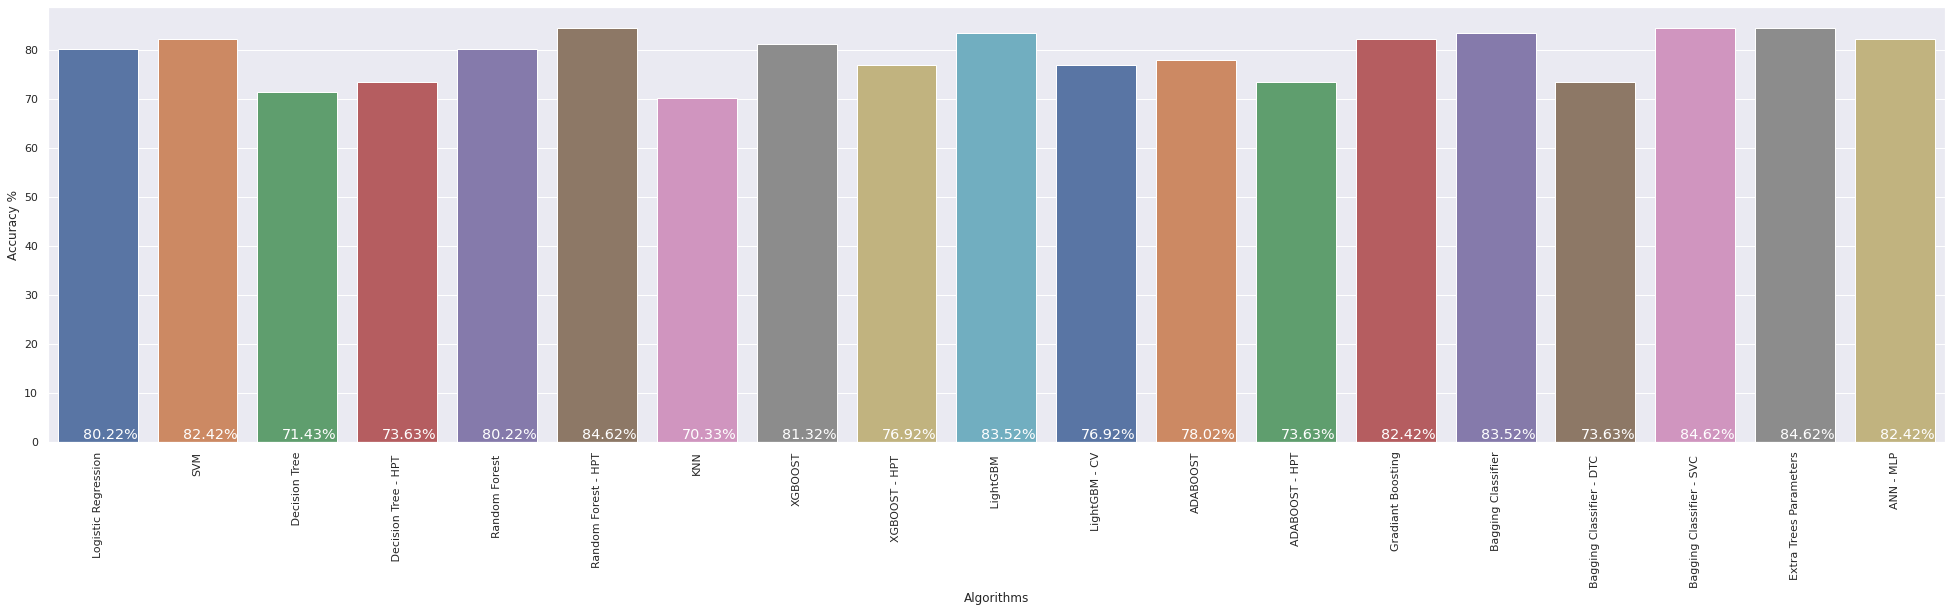

In [214]:
methods = ["Logistic Regression","SVM"," Decision Tree" ," Decision Tree - HPT ","Random Forest ","Random Forest - HPT", "KNN", 
           "XGBOOST", "XGBOOST - HPT ", " LightGBM ", "LightGBM - CV", "ADABOOST", "ADABOOST - HPT", "Gradiant Boosting", 
           "Bagging Classifier", "Bagging Classifier - DTC ", "Bagging Classifier - SVC ", "Extra Trees Parameters", "ANN - MLP"]
accuracy = [test_score_logic,test_score_svm,test_score_dct,test_score_dct_hpt,test_score_rndfr,test_score_rdn_hpt,test_score_knn,
            test_score_xgb,test_score2_xgb_grid,test_score_light,test_score_light_cv,test_score_ada,test_score_ada_hpt,
            test_score_gra, test_score_bg,test_score_bg_dct,test_score_bag_svc, test_score_extree, test_score_ann_mlp,]

sns.set()
plt.figure(figsize=(34,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=methods, y=accuracy, palette="deep")

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]), # yazdırılacak değer
             horizontalalignment='left',
              size='large',
             color="white",
              
             )

        
plt.savefig('compare.png',transparent=True)

        
plt.show()